In [4]:
import numpy as np

In [2]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\soham\appdata\local\programs\python\python39\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\soham\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
from matplotlib import pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [6]:
quality = ctrl.Antecedent(np.arange(0,11,1) ,'quality')
service = ctrl.Antecedent(np.arange(0,11,1) ,'service')
tip = ctrl.Consequent(np.arange(0,26,1) , 'tip')

In [7]:
#fuzzification
quality.automf(3)         # bad , average, good
service.automf(3) 

c:\users\soham\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


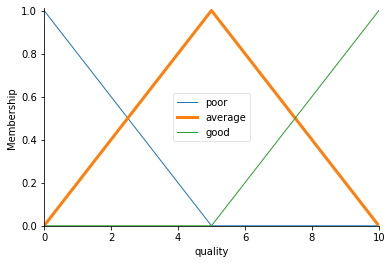

In [8]:
quality['average'].view()
plt.show()

c:\users\soham\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


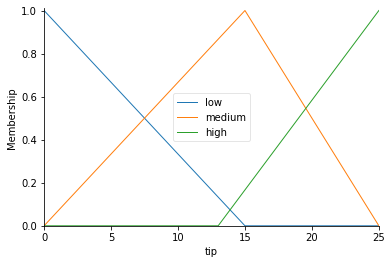

In [9]:
#create your own membership function
#the three numbers in the array specify the x-coordinate of each vertex of triangle
tip['low'] = fuzz.trimf(tip.universe, [0,0,15]) #generate a traingular membership function
tip['medium'] = fuzz.trimf(tip.universe, [0,15,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])
tip.view()
plt.show()

21.0


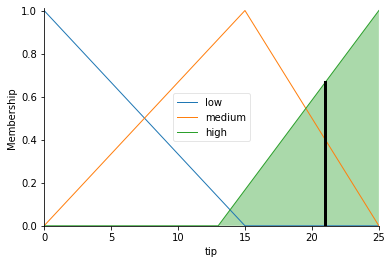

In [12]:
#now define fuzzy rules
#the first argument is the antecedent
#the second argument is the consequent membership function
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'] , tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#specify the inputs
tipping.input['quality'] = 10
tipping.input['service'] = 10

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)
plt.show()